# HW11

## alireza darvishi 96109674

### 3.18

In [1]:
import numpy as np
import cvxpy as cp
import matplotlib.pylab as plt
import pandas as pd

np.random.seed(0)
(m, n) = (300, 100)
A = np.random.rand(m, n)
A = np.asmatrix(A)
b = A.dot(np.ones((n, 1))) / 2
b = np.asmatrix(b)
b = np.array(b).reshape(300,)
c = -np.random.rand(n, 1)
c = np.asmatrix(c)

In [2]:
x = cp.Variable(n)
objective = cp.Minimize(c.T @ x)
constraints = [A @ x - b <= 0, 0 <= x, x <= 1]
problem = cp.Problem(objective, constraints)
print("L is:", problem.solve())

L is: -34.41722425996279


optimal threshold: 0.56
U-L =  0.8399729146557675


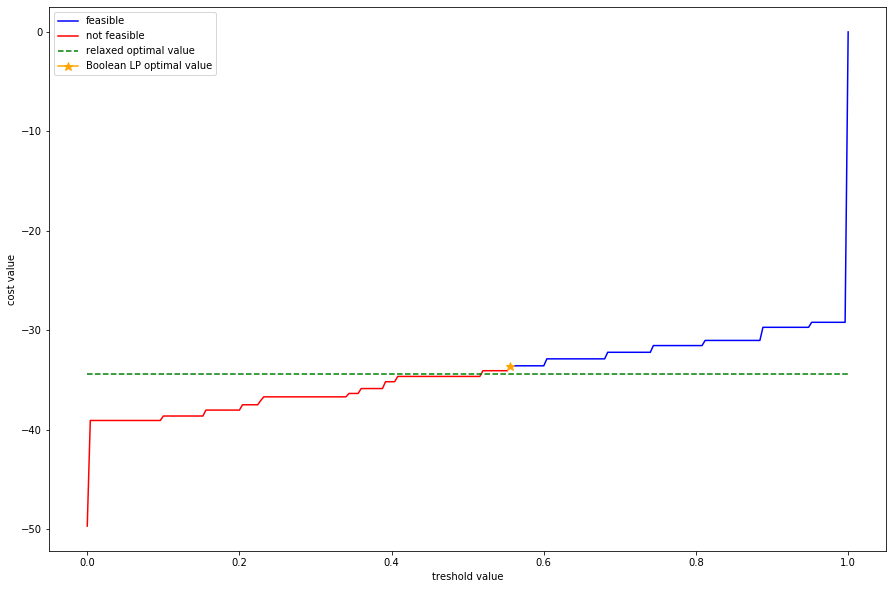

In [3]:
k = 250
t = np.linspace(0, 1, k + 1)
slack = np.zeros(k + 1)
sol = np.zeros(k + 1)
for tresh in t:
    i = int(k * tresh)
    xrlx = (x.value >= tresh) * 1
    slack[i] = (A @ xrlx - b).max()
    sol[i] = c.T @ xrlx
plt.figure(figsize=(15, 10))
plt.plot(t[slack <= 0], sol[slack <= 0], c="blue", label="feasible")
plt.plot(t[slack > 0], sol[slack > 0], c="red", label="not feasible")
plt.plot(
    [0, 1],
    [problem.value, problem.value],
    c="green",
    label="relaxed optimal value",
    ls="--",
)
plt.ylabel("cost value")
plt.xlabel("treshold value")
idx = np.argmin(sol[slack <= 0])
t_min = t[slack <= 0][idx]
plt.plot(
    t_min,
    min((sol[slack <= 0])),
    marker="*",
    c="orange",
    ms=9,
    label="Boolean LP optimal value",
)
plt.legend(loc=2)
print("optimal threshold:", round(t_min, 2))
print("U-L = ", min((sol[slack <= 0])) - problem.value)

### 3.20

optimal value for fuel consumption is: 2617.825193529012


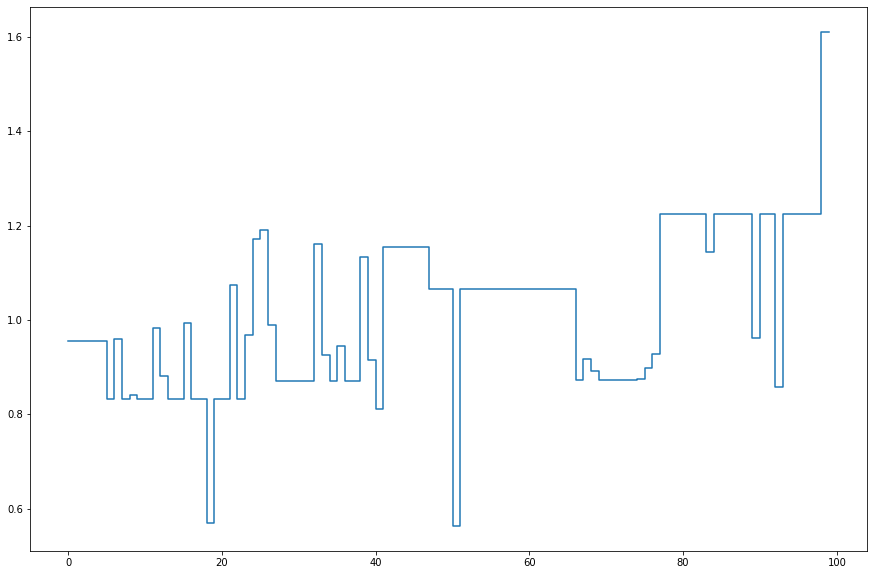

In [4]:
from veh_speed_sched_data import *

t = cp.Variable(n)
fuel = (
    a * cp.multiply(cp.square(cp.reshape(d, (100,))), cp.inv_pos(t))
    + b * cp.reshape(d, (n,))
    + c * t
)
objective = cp.Minimize(sum(fuel))
constraints = [
    t <= cp.reshape(d / smin, (n,)),
    t >= cp.reshape(d / smax, (n,)),
    cp.cumsum(t) <= cp.reshape(tau_max, (n,)),
    cp.cumsum(t) >= cp.reshape(tau_min, (n,)),
]
problem = cp.Problem(objective, constraints)
print("optimal value for fuel consumption is:", problem.solve())
s = np.array(d).reshape(n,) / t.value
plt.figure(figsize=(15, 10))
plt.step(np.arange(n), s)

### 3.28

In [5]:
p = cp.Variable(16)
idx = [np.binary_repr(i, width=4) for i in range(16)]
max_objective = cp.Maximize(
    sum(p[index] for index in np.array([1, 3, 5, 7, 9, 11, 13, 15]))
)
min_objective = cp.Minimize(
    sum(p[index] for index in np.array([1, 3, 5, 7, 9, 11, 13, 15]))
)
constraints = [p >= 0, sum(p) == 1]
constraints += [
    sum(p[index] for index in np.array([8, 9, 10, 11, 12, 13, 14, 15])) == 0.9
]
constraints += [
    sum(p[index] for index in np.array([4, 5, 6, 7, 12, 13, 14, 15])) == 0.9
]
constraints += [
    sum(p[index] for index in np.array([2, 3, 6, 7, 10, 11, 14, 15])) == 0.1
]
constraints += [sum(p[index] for index in np.array([10, 14])) == 0.7 * 0.1]
constraints += [
    sum(p[index] for index in np.array([5, 13]))
    == 0.6 * sum(p[index] for index in np.array([4, 5, 12, 13]))
]
max_problem = cp.Problem(max_objective, constraints)
max_problem.solve()
min_problem = cp.Problem(min_objective, constraints)
min_problem.solve()
print(
    "P(X4=1) is in range:",
    round(min_problem.value, 2),
    "to",
    round(max_problem.value, 2),
)

P(X4=1) is in range: 0.48 to 0.61


### 4.1

#### a

In [6]:
x = cp.Variable(2)
u1 = cp.Parameter(value=-2)
u2 = cp.Parameter(value=-3)
P = np.array([[2, -1], [-1, 4]])
q = np.array([-1, 0])
objective = cp.Minimize(cp.quad_form(x, P) / 2 + q.T * x)
A = np.array([[1, 2], [1, -4], [5, 76]])
b = u1 * [1, 0, 0] + u2 * [0, 1, 0] + [0, 0, 1]
constraints = [A @ x <= b]
problem = cp.Problem(objective, constraints)
pstar = problem.solve()
lambdas = constraints[0].dual_value
print("x values are:", x.value)
print("lambda values are:", lambdas)
print("p* value is:", pstar)
print("KKT:")
print("1st: primal constraints", A @ x.value - b.value <= 10 ** -10)
print("2nd: dual constraints", constraints[0].dual_value >= 0)
print(
    "3rd: complementary slackness",
    abs(constraints[0].dual_value * (A @ x.value - b.value)) <= 10 ** -10,
)
print(
    "4th: gradient of Lagrangian with respect to x vanishes",
    abs(P @ x.value + q + A.T @ constraints[0].dual_value) <= 10 ** -10,
)

x values are: [-2.33333333  0.16666667]
lambda values are: [2.74774125 2.88523345 0.04007173]
p* value is: 8.222222222222223
KKT:
1st: primal constraints [ True  True  True]
2nd: dual constraints [ True  True  True]
3rd: complementary slackness [ True  True  True]
4th: gradient of Lagrangian with respect to x vanishes [ True  True]


#### b

In [7]:
data = np.zeros((9, 4))
row = 0
for del1 in (0, -0.1, 0.1):
    for del2 in (0, -0.1, 0.1):
        pred = pstar - lambdas @ [del1, del2, 0]
        u1.value = -2 + del1
        u2.value = -3 + del2
        exact = problem.solve()
        data[row, :] = (del1, del2, round(pred, 2), round(exact, 2))
        row += 1
print((data[:, 2] - data[:, 3] <= 0).all())

True


In [8]:
pd.DataFrame(data, columns=["delta1", "delta2", "pred", "exact"])

,delta1,delta2,pred,exact
0,0.0,0.0,8.22,8.22
1,0.0,-0.1,8.51,8.71
2,0.0,0.1,7.93,7.98
3,-0.1,0.0,8.50,8.57
4,-0.1,-0.1,8.79,8.82
5,-0.1,0.1,8.21,8.32
6,0.1,0.0,7.95,8.22
7,0.1,-0.1,8.24,8.71
8,0.1,0.1,7.66,7.75


In [10]:
t<=cp.reshape(smin,(n,))
t<=np.array(smin).reshape((n,))

Inequality(Variable((100,)))